<a href="https://colab.research.google.com/github/rashmi0852/Netflix_Content_Clustering_and_Recommended_System/blob/main/Netflix_Content_and_Recommended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Netflix_Content_Clustering_and_Recommended_System





##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [415]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Dataset Loading

In [416]:
# Load Dataset
netflix=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [417]:
# Dataset First Look
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [418]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [419]:
# Dataset Rows & Columns count

num_rows, num_cols = netflix.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 7787
Total columns in dataset= 12


### Dataset Information

In [420]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [421]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [422]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
netflix.isnull().sum()

Missing Values in each column
------------------------------


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

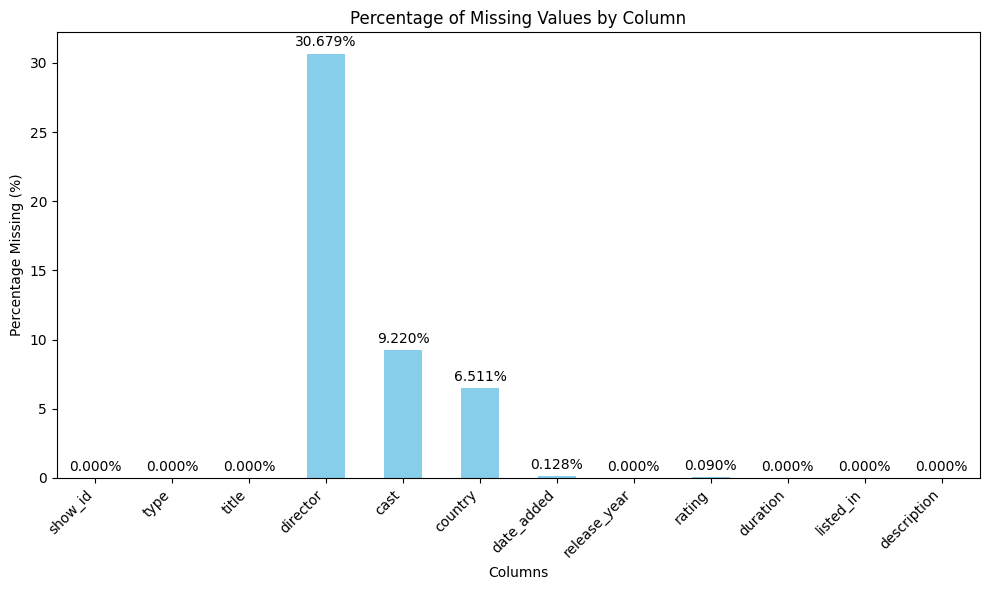

In [423]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()



### What did you know about your dataset?

By exploring Netflix content datset following insights were found
* The dataset contains 12 features and 7,787 records.
* Five features contain missing values, with "director" having the highest number of null values, accounting for approximately 30% of its data, while the other four features have less than 10% missing data.
* Out of the 12 features, 11 are of categorical type, while the feature "release_year" is of numerical type.
* The "date_added" column values are in a time/date format, and the "duration" column values are in numeric format, so both need to be converted to their respective data types from the object type.

## ***2. Understanding Your Variables***

In [424]:
# Dataset Columns
# Dataset Columns
print(f"Available columns:\n{netflix.columns}")

Available columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [425]:
# Dataset Describe
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

* show_id: Unique identifier for each movie/show.

* type: Indicates whether the entry is a movie or a TV show.

* title: Name of the movie or TV show.

* director: Name of the director(s) of the movie or TV show.

* cast: Names of the actors and actresses featured in the movie or TV show.

* country: Country or countries where the movie or TV show was produced.

* date_added: Date when the movie or TV show was added to Netflix.

* release_year: Year when the movie or TV show was released.

* rating: TV rating or movie rating of the movie or TV show.

* duration: Length of the movie or TV show in minutes or seasons.

* listed_in: Categories or genres of the movie or TV show.

* description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [426]:
# Check Unique Values for each variable.
for column in netflix.columns:
    # Get value counts for the current column
    value_counts = netflix[column].value_counts()

    # Get the number of unique values for the current column
    nunique = netflix[column].nunique()

    # Print the results for the current column
    print("--" * 50)
    print("Column Name:", column)
    print("\nNumber of Unique Values:", nunique)
    print("\nValue Counts:")
    print(value_counts,"\n")
    print("--" * 50)
    print("\n")


----------------------------------------------------------------------------------------------------
Column Name: show_id

Number of Unique Values: 7787

Value Counts:
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: type

Number of Unique Values: 2

Value Counts:
Movie      5377
TV Show    2410
Name: type, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: title

Number of Unique Values: 7787

Value Counts:
3%                                          1
Results                     

* Focus is on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, plan is to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, I will  develop a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Null Values

In [427]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent )

show_id          0.000
type             0.000
title            0.000
director        30.679
cast             9.220
country          6.511
date_added       0.128
release_year     0.000
rating           0.090
duration         0.000
listed_in        0.000
description      0.000
dtype: float64


In [428]:
# Drop records of those columns whose missing values less than 5%.
netflix.dropna(subset=["rating","date_added"],inplace=True)

In [429]:
#calculate mode & fill missing of country column

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Transform and fill the missing values in the "country" column
netflix['country'] = imputer.fit_transform(netflix[['country']])

In [430]:
# Replace missing values in the "cast" column with "unknown"
netflix['cast'].fillna('unknown', inplace=True)

# Replace missing values in the "director" column with "unknown"
netflix['director'].fillna('unknown', inplace=True)

In [431]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


#### Duration to numeric

In [432]:
# Extract the numeric part of the "duration" column and convert it to integer
netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)


In [433]:
netflix["duration"].head()

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: int64

#### date_added to date type

In [434]:
# Convert the "date_added" column to datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])


In [435]:
# Extract date, month, and year
netflix['added_day'] = netflix['date_added'].dt.day
netflix['added_month'] = netflix['date_added'].dt.month
netflix['added_year'] = netflix['date_added'].dt.year



In [436]:
netflix[["date_added","added_day","added_month","added_year"]].head()

,date_added,added_day,added_month,added_year
0,2020-08-14,14,8,2020
1,2016-12-23,23,12,2016
2,2018-12-20,20,12,2018
3,2017-11-16,16,11,2017
4,2020-01-01,1,1,2020


In [437]:
# Dropping date_added
netflix.drop('date_added', axis=1, inplace=True)

#### Ratings handeling

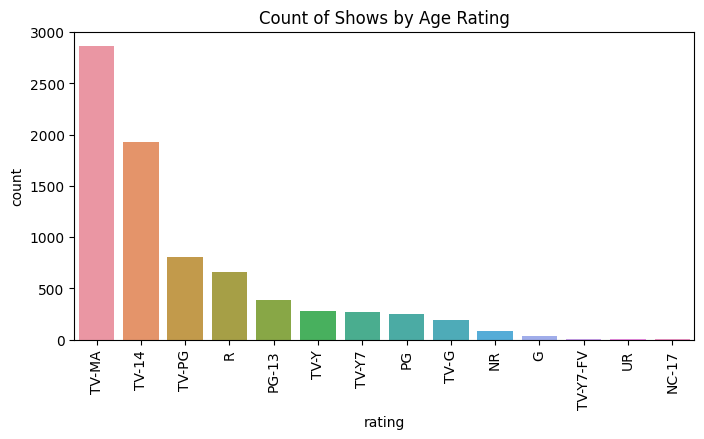

In [438]:
# Create a countplot to visualize the age ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Count of Shows by Age Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [439]:
#Unique values of rating
print(netflix["rating"].unique())
netflix["rating"].nunique()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


14

In [440]:
#Create corresponding alternate map for all categories
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'NR':'Adults',
              'NC-17':'Adults',
              'UR':'Adults',
              'TV-14':'Young Adults',
              'PG-13':'Teens',
              'TV-PG':'Older Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'TV-Y7-FV':'Older Kids',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'G':'Kids',
            }

In [441]:
#Replace by map values
netflix['rating'].replace(rating_map, inplace = True)

In [442]:
print(netflix['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


##### Extract primary value for country & listed_in

In [443]:
#check values of coutry column
netflix["country"].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [444]:
#check values of listed_in column
netflix["listed_in"].value_counts()


Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [495]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
netflix['country'] = netflix['country'].apply(extract_primary)
netflix['listed_in'] = netflix['listed_in'].apply(extract_primary)


netflix.sample(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
6236,s6237,Movie,The Con Is On,James Haslam,"Uma Thurman, Tim Roth, Alice Eve, Parker Posey...",United States,2018,Adults,95,Comedies,Two wedded partners-in-crime flee from their m...,21,12,2020
325,s326,Movie,After Maria,Nadia Hallgren,unknown,United States,2019,Older Kids,38,Documentaries,"Displaced by Hurricane Maria, three Puerto Ric...",24,5,2019
4200,s4201,Movie,Monster Island,Leopoldo Aguilar,"Joey Camen, Fiona Hardingham, Johnny Rose, Kat...",India,2017,Older Kids,81,Children & Family Movies,When a teenager discovers he's not really huma...,1,12,2017
3619,s3620,TV Show,License to Drill: Louisiana,unknown,unknown,Canada,2014,Older Kids,1,Reality TV,A crew of oil riggers work an off-season job a...,2,10,2019
6563,s6564,Movie,The Last Laugh,Greg Pritikin,"Chevy Chase, Richard Dreyfuss, Andie MacDowell...",United States,2019,Adults,99,Comedies,"After moving to a retirement home, restless ta...",11,1,2019


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [446]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [447]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [448]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [449]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [450]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [451]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [452]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [453]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [454]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [455]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [456]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [457]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [458]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [459]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [460]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [461]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [462]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [463]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [464]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [465]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [466]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [467]:
# Expand Contraction

#### 2. Lower Casing

In [468]:
# Lower Casing

#### 3. Removing Punctuations

In [469]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [470]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [471]:
# Remove Stopwords

In [472]:
# Remove White spaces

#### 6. Rephrase Text

In [473]:
# Rephrase Text

#### 7. Tokenization

In [474]:
# Tokenization

#### 8. Text Normalization

In [475]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [476]:
# POS Taging

#### 10. Text Vectorization

In [477]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [478]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [479]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [480]:
# Transform Your data

### 6. Data Scaling

In [481]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [482]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [483]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [484]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [485]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [486]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [487]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [488]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [489]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [490]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [491]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [492]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [493]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [494]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***